# Proyectos prometedores Ice

# Tabla de Contenidos

1. [Descripción del análisis](#Descripción-del-análisis)
    
    1.1 [Carga de datos](#Carga-de-datos)
    
    1.2 [Corrección de datos](#Correción-de-datos)

2. [Análisis de datos](#Análisis-de-datos)
    
    2.1. [Análisis general de los datos](#Análisis-general-de-los-datos)
    
    2.2 [Plataformas más vendidas 1980-1999](#Plataformas-más-vendidas-1980-1999)
    
    2.3 [Plataformas más vendidas 2000-2016](#Plataformas-más-vendidas-2000-2016)
    
    2.4 [Descripción de las plataformas más vendidas 2000-2016](#Descripción-de-las-plataformas-más-vendidas-2000-2016)
    
    2.5 [Descripción de las plataformas más vendidas de 1980-1999](#Descripción-de-las-plataformas-más-vendidas-de-1980-1999)
    
    2.6 [Los años con más ventas](#Los-años-con-más-ventas)
    
    2.7 [Análisis de las puntuaciones]("Análisis-de-las-puntuaciones)

3. [Análisis por región](#Análisis-por-región)
    
    3.1 [Ventas en Norteamérica](#Ventas-en-Norteamérica)
    
    3.2 [Ventas en Europa](#Ventas-en-Europa)
    
    3.3 [Ventas en Japón](#Ventas-en-Japón)
    
    3.1 [Otras ventas](#Otras-ventas)

4. [Prueba de hipótesis](#Prueba-de-hipótesis)

5. [Conclusiones]("Conclusiones)

## Descripción del análisis
<a id="Descripción del análisis"></a>
Ice es una tienda en línea con presencia global, ofreciendo productos en diversas partes del mundo, incluyendo Norteamérica, Europa, Japón y otros mercados internacionales. A medida que nos acercamos al año 2017, es fundamental para Ice identificar y evaluar las plataformas de comercio electrónico más prometedoras y adecuadas para su expansión y consolidación en estos mercados. 

Este análisis tiene como principal propósito examinar las plataformas digitales que puedan proporcionar a Ice una ventaja competitiva significativa, mejorar la experiencia del cliente y optimizar las operaciones logísticas y de marketing.
Este análisis exhaustivo será crucial para tomar decisiones informadas y estratégicas que permitan a Ice obtener nuevas oportunidades de crecimiento y expansión en el dinámico panorama del comercio electrónico del 2017.

Primero se realizará un análisis de manera general para así poder tener una perspectiva mucho más amplia, con esto poder identificar así a las plataformas en las que nos centraremos para este análisis. Después de terminar el análisis general pasaremos a realizar un análisis más puntual no solo de las plataformas, sino de otros aspectos importantes que deben ser tomados en cuenta tales como: los géneros con más rentabilidad o las clasificaciones más vendidas, incluso las puntuaciones que los profesionales tienen de cada plataforma, otro punto en el cual se realizara un análisis es en las regiones en las que Ice tiene presencia. Así con este análisis podremos tomar la mejor decisión a cerca de las plataformas a considerar.

### Carga de datos
<a id="Carga de datos"></a>

In [89]:
#Carga de las librerías
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy.stats import levene

In [2]:
#Carga de los datos 
df_ice_data = pd.read_csv("/datasets/games.csv")
print(df_ice_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


A simple vista se puede observar la presencia de datos ausentes en algunas columnas, en algunas estos datos son significativos, mientras que en otras estos datos son mínimos. 

In [3]:
#Mostramos las 15 primeras filas
print(df_ice_data.head(15))

                           Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii           2006.0        Sports   
1             Super Mario Bros.      NES           1985.0      Platform   
2                Mario Kart Wii      Wii           2008.0        Racing   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                        Tetris       GB           1989.0        Puzzle   
6         New Super Mario Bros.       DS           2006.0      Platform   
7                      Wii Play      Wii           2006.0          Misc   
8     New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                     Duck Hunt      NES           1984.0       Shooter   
10                   Nintendogs       DS           2005.0    Simulation   
11                Mario Kart DS       DS           2005.0        Racing   
12  Pokemon Gold/Pokemon 

### Corrección de datos 
<a id="Corrección de datos"></a>

In [4]:
# Cambiamos los nombres de las columnas en minúsculas
df_ice_data.columns = df_ice_data.columns.str.lower()

In [5]:
# Comprobamos que los nombres han sido modificados correctamente
df_ice_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Comprobamos la existencia de filas duplicadas
print(df_ice_data.duplicated().sum())

0


In [7]:
# Mostramos cuntos valores ausentes tiene year_of_release
print(df_ice_data[df_ice_data["year_of_release"].isna()])

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

In [8]:
# Rellenamos los valores ausentes con el valor promedio de los años
df_ice_data["year_of_release"] = df_ice_data["year_of_release"].fillna(df_ice_data["year_of_release"].mean())

In [9]:
# Convertimos el tipo de valores de year_of_release
df_ice_data["year_of_release"] = df_ice_data["year_of_release"].astype(int)
print(df_ice_data["year_of_release"].dtype)

int64


In [10]:
# Cambiamos el valor "TBD" a 0.0 ya que aun no se ha determinado cual es su valor para user_score
def convert_tbd (value):
    if value == "tbd":
        return "0.0"
    else:
        return value
    
df_ice_data["user_score"] = df_ice_data["user_score"].apply(convert_tbd)

In [11]:
# Cambiamos el tipo de valor de la columna user_score
# Rellenamos las filas con valores ausentes en la columna user_score por la mediana
df_ice_data["user_score"] = df_ice_data["user_score"].astype(float)
median_user_score = df_ice_data["user_score"].median()
median_user_score_rounded = round(median_user_score, 1)
df_ice_data["user_score"] = df_ice_data["user_score"].fillna(median_user_score_rounded)
print(df_ice_data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         6.9    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         6.9    NaN  


In [12]:
# Cambiamos las filas con valores ausentes en la columna critic_score por la mediana
median_critic_score = df_ice_data["critic_score"].median()
df_ice_data["critic_score"].fillna(median_critic_score, inplace=True)
print(df_ice_data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77          71.0         6.9    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00          71.0         6.9    NaN  


In [13]:
# Convertimos de tipo a la columna critic_score
df_ice_data["critic_score"] = df_ice_data["critic_score"].astype(int)
print(df_ice_data["critic_score"].dtype)

int64


In [14]:
# Cambiamos las filas con valores ausentes en la columna rating
df_ice_data["rating"].fillna("sin especificar", inplace=True)
print(df_ice_data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score           rating  
0     28.96      3.77         8.45            76         8.0                E  
1      3.58      6.81         0.77            71         6.9  sin especificar  
2     12.76      3.79         3.29            82         8.3                E  
3     10.93      3.28         2.95            80         8.0                E  
4      8.89     10.22         1.00            71         6.9  sin especificar  


Primero cambiamos el nombre de las columnas a minúsculas para un mejor manejo, observamos si existen valores ausentes, los valores ausentes de la columna "yaer_of_release" fueron sustituidos por el valor medio de la fechas existentes, en la columna "user_score" fueron sustituidos los valores de "TBD" a 0.0 esto porque es un valor que aún no está determinado, los valores ausentes de la columna "critic_score" fueron sustituidos por la mediana de los datos que los profesionales han realizado a lo largo del tiempo, por último los valores de la columna "rating" fueron sustituidos por "sin clasificar" para evitar que esos datos se perdieran.

## Análisis de datos
<a id="Análisis de datos"></a>

### Análisis general de los datos
<a id="Análisis deneral de los datos"></a>

In [30]:
# Observamos el numero de veces que se repite cada año de lanzamiento
year_counts = df_ice_data["year_of_release"].value_counts().sort_index()
print(year_counts.sort_values(ascending=False).head())

2008    1427
2009    1426
2006    1275
2010    1255
2007    1197
Name: year_of_release, dtype: int64


In [31]:
# Mostramos cuantas veces se repite cada plataforma
platform_counts = df_ice_data["platform"].value_counts()
print(platform_counts.sort_values(ascending=False).head())

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64


In [32]:
# Obtenemos el total de las ventas
df_ice_data["total_sales"] = df_ice_data["na_sales"] + df_ice_data["eu_sales"] + df_ice_data["jp_sales"] + df_ice_data["other_sales"]
print(df_ice_data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score           rating  \
0     28.96      3.77         8.45            76         8.0                E   
1      3.58      6.81         0.77            71         6.9  sin especificar   
2     12.76      3.79         3.29            82         8.3                E   
3     10.93      3.28         2.95            80         8.0                E   
4      8.89     10.22         1.00            71         6.9  sin especificar   

   total_sales  
0        

Obtenemos las ventas totales sumando las ventas que se realizaron en Norteamerica, Europa, Japón y otras ventas.

In [33]:
# Agrupamos la plataforma con lasz ventas totales
group_platforms = df_ice_data.groupby("platform")["total_sales"].sum().reset_index()
print(group_platforms)

   platform  total_sales
0      2600        96.98
1       3DO         0.10
2       3DS       259.00
3        DC        15.95
4        DS       806.12
5        GB       255.46
6       GBA       317.85
7        GC       198.93
8       GEN        30.77
9        GG         0.04
10      N64       218.68
11      NES       251.05
12       NG         1.44
13       PC       259.52
14     PCFX         0.03
15       PS       730.86
16      PS2      1255.77
17      PS3       939.65
18      PS4       314.14
19      PSP       294.05
20      PSV        54.07
21      SAT        33.59
22      SCD         1.86
23     SNES       200.04
24     TG16         0.16
25       WS         1.42
26      Wii       907.51
27     WiiU        82.19
28     X360       971.42
29       XB       257.74
30     XOne       159.32


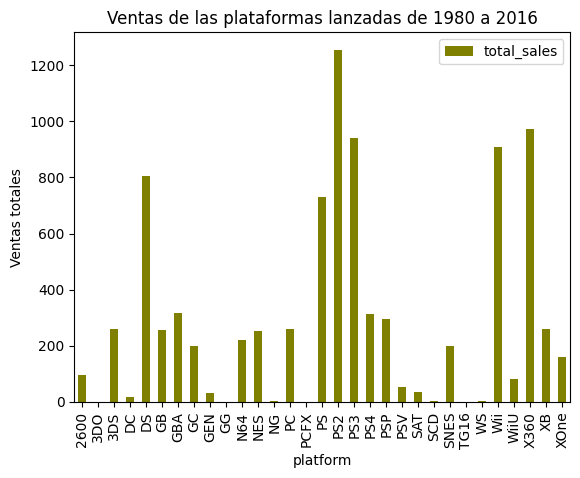

In [19]:
# Mostramos el grafico de ventas en general

group_platforms.plot(kind="bar",
                     x="platform",
                     y="total_sales",
                     xlabel="platform",
                     ylabel="Ventas totales",
                     title="Ventas de las plataformas lanzadas de 1980 a 2016",
                     color="olive")

plt.show()

In [34]:
# Buscamos las platafromas con más ventas
top_platforms = group_platforms.groupby("platform")["total_sales"].sum().nlargest(3).index
print(top_platforms)

Index(['PS2', 'X360', 'PS3'], dtype='object', name='platform')


Como se puede observar en el gráfico y con referencia a las ventas totales desde el año 1980 a 2016, las platafromas con más ventas a lo largo de este periodo son en primer lugar PS2, en segundo lugar X360, en tercer lugar PS3 y el cuarto lugar Wii, y las ge menos generaron ventas a lo largo de este periodo fueron 3DO, GG, PCFX y TG16.

In [35]:
# Buscamos el año con más ventas
filtered_year = df_ice_data.groupby("year_of_release")["total_sales"].sum()
print(filtered_year.head())

year_of_release
1980    11.38
1981    35.68
1982    28.88
1983    16.80
1984    50.35
Name: total_sales, dtype: float64


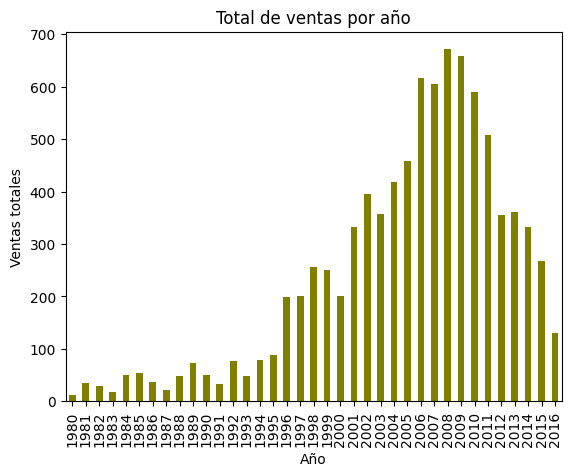

In [36]:
# Creamos el grafico para observar el año en que más se obtuvo ventas

ax = filtered_year.plot(xlabel="Año",
                        ylabel="Ventas totales",
                        color="olive",
                        kind="bar",
                        title="Total de ventas por año",
                        x="year_of_release")


plt.show()


Observamos en el gráfico que las mayores ventas se realizaron en el año 2008 seguido por el año 2009 y el año 2006, los años en los que menos se reslizon ventas fueron 1980, 1983 y 1987.

In [37]:
# Mostramos las ventas totales por los géneros 
genre_total_sales = df_ice_data.groupby("genre")["total_sales"].sum()
print(genre_total_sales.head())

genre
Action       1744.17
Adventure     237.59
Fighting      447.53
Misc          802.51
Platform      827.77
Name: total_sales, dtype: float64


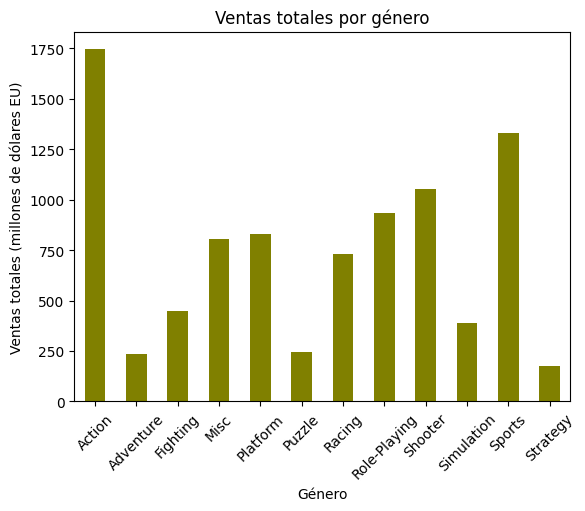

In [38]:
# Mostramos un gráfico de las ventas totales por género
genre_total_sales.plot(title="Ventas totales por género",
                      kind="bar",
                      xlabel="Género",
                      ylabel="Ventas totales (millones de dólares EU)",
                      color="olive")

plt.xticks(rotation=45)
plt.show()

Uno de los generos que cuantas con mas ventas registradas en el periodo 1980-2016 es el de Acción con 1744 millones de dólares vendidos.

<AxesSubplot:xlabel='total_sales'>

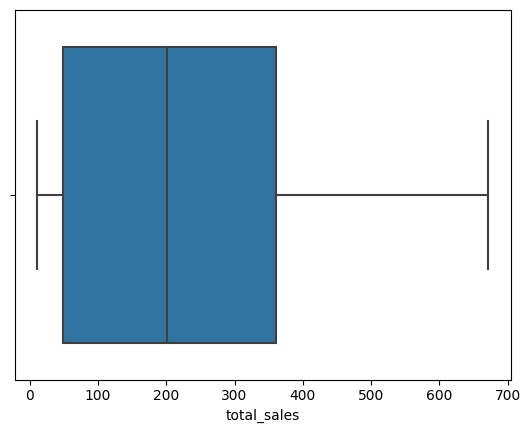

In [39]:
# Mostramos un diagrama de las ventas totales globales 

sns.boxplot(filtered_year)

In [26]:
print(np.mean(filtered_year))

240.96513513513378


Podemos observar el valor de la media está un poco arriba de 200, el Q1 y Q3 está entre los valores 50 y 350 aproximadamente, no parece haber valores atípicos, tenemos valores extensos los cuales están muy cerca del valor 0 y más de 600, y el gráfico nos muestra una simetría hacia la derecha. 

<AxesSubplot:xlabel='total_sales'>

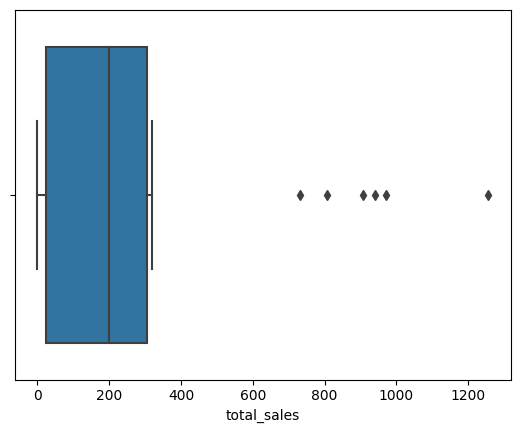

In [40]:
# Mostramos el gráfico de las plataformas
sns.boxplot(group_platforms["total_sales"])

In [41]:
print(np.mean(group_platforms))

total_sales    287.603548
dtype: float64


Podemos decir que el valor de la media se encuentra en 287.6, el Q1 está cerca del valor 0, el Q3 está un poco más arriba de 300, algo muy notable que se puede observar es la existencia de valores atípicos que van desde alrededor de 600 a 1200, son valores que son más altos que el resto, muestra datos segados hacia la derecha y podemos que decir que la mayoría de los datos esta agrupado entre 0 y 400 aproximadamente.

###  Plataformas más vendidas 1980-1999 
<a id="Plataformas más vendidas 1980-1999"></a>

In [42]:
# Buscaremos las plataformas con mas ventas antes del 2000
filtered_sales_1900 = df_ice_data[(df_ice_data["year_of_release"] <= 1999)]
top_1900 = filtered_sales_1900.groupby("platform")["total_sales"].sum().nlargest(5).index
print(top_1900)

Index(['PS', 'NES', 'GB', 'SNES', 'N64'], dtype='object', name='platform')


Podemos observar que en el periodo de 1980 a 1999 las plataformas que obtuvieron más ventas fueron PS, NES, GB, SNES y N64, realizando uan comparacion con los datos obtenidos anteriormente podemos decir que a pesar de que estas plataformas fueran las más vendidas en este periodo no estan en la lista de las plataformas más vendidas del perido completo (1980-2016).

### Plataformas más vendidas 2000-2016
<a id="Plataformas más vendidas 2000-2016"></a>

In [44]:
# Buscaremos las platafromas mas vendidas después del año 2000
filtered_sales_2000 = df_ice_data[(df_ice_data["year_of_release"] >= 2000)]
top_2000 = filtered_sales_2000.groupby("platform")["total_sales"].sum().nlargest(5).index
print(top_2000)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


Podemos observar que las plataformas con más ventas del periodo del 2000 a 2016 las plataformas con más ventas son PS2, X360, PS3, Wii y DS, comparando con las plataformas con más ventas del periodo 1980-2016 se puede decir que son las mismas platafromas.

### Descripción de las plataformas más vendidas 2000-2016
<a id="Descripción de las plataformas más vendidas 2000-2016"></a>

In [45]:
# Buscamos el total de las ventas de PS2 por año 
filtered_ps2 = df_ice_data[df_ice_data["platform"] == "PS2"]
group_ps2 = filtered_ps2.groupby("year_of_release")["total_sales"].sum()
print(group_ps2.head())

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
Name: total_sales, dtype: float64


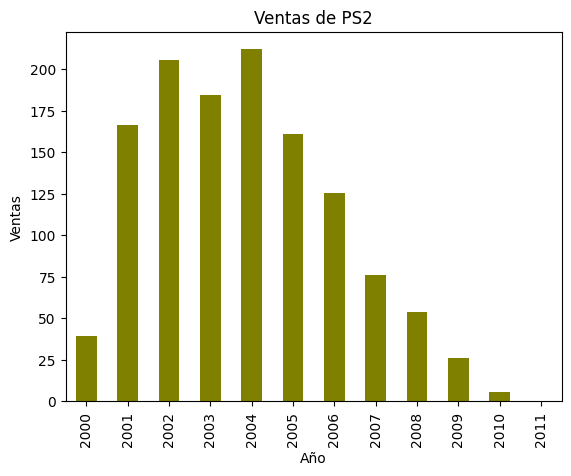

In [46]:
# Mostramos el gráfico PS2
group_ps2.plot(kind="bar",
              xlabel="Año",
              ylabel="Ventas",
              title="Ventas de PS2",
              color= "olive")

plt.show()

Como se puede observar en el gráfico el año en el que se generó más ventas es 2004, y el periodo de 2010 a 2011 las ventas han disminuido considerablemente.  

In [47]:
# Buscamos el total de las ventas de X360 por año 
filtered_x360 = df_ice_data[df_ice_data["platform"] == "X360"]
group_x360 = filtered_x360.groupby("year_of_release")["total_sales"].sum()
print(group_x360.head())

year_of_release
2005      8.25
2006     61.80
2007     95.41
2008    135.26
2009    120.29
Name: total_sales, dtype: float64


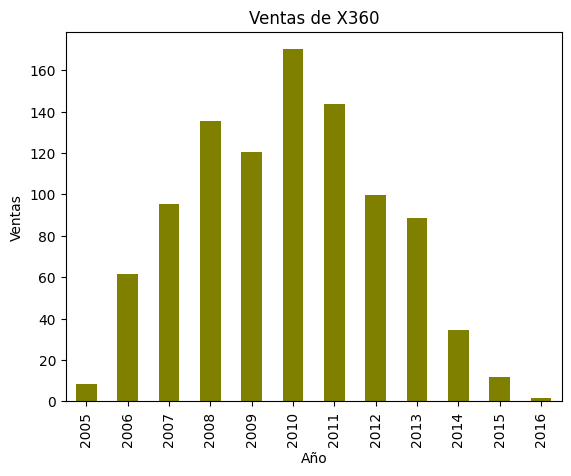

In [48]:
# Mostramos el gráfico PS2
group_x360.plot(kind="bar",
              xlabel="Año",
              ylabel="Ventas",
              title="Ventas de X360",
              color= "olive")

plt.show()

Observamos que el año en que X360 genero mas ventas en 2010, también se puede ver que en el periodo de 2011 a 2016 aun tiene ventas.

In [49]:
# Buscamos el total de las ventas de PS3 por año
filtered_ps3 = df_ice_data[df_ice_data["platform"] == "PS3"]
group_ps3 = filtered_ps3.groupby("year_of_release")["total_sales"].sum()
print(group_ps3.head())

year_of_release
2006     29.27
2007     73.19
2008    118.52
2009    130.93
2010    142.17
Name: total_sales, dtype: float64


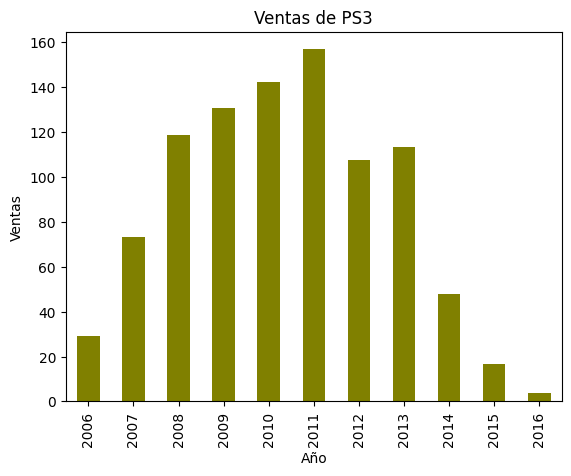

In [50]:
# Mostramos el gráfico PS3
group_ps3.plot(kind="bar",
              xlabel="Año",
              ylabel="Ventas",
              title="Ventas de PS3",
              color= "Olive")

plt.show()

Los primeros años de su lanzamiento PS3 tiene una buena aceptación ya sé que refleja en las ventas hasta 2013, para 2014 y hasta 2016 estas ventas disminuyen.

### Descripción de las plataformas más vendidas de 1980-1999
<a id="Descripción de las plataformas más vendidas 1980-1999"></a>

In [51]:
# Buscamos el total de las ventas de PS por año
filtered_ps = df_ice_data[df_ice_data["platform"] == "PS"]
group_ps = filtered_ps.groupby("year_of_release")["total_sales"].sum()
print(group_ps.head())

year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
Name: total_sales, dtype: float64


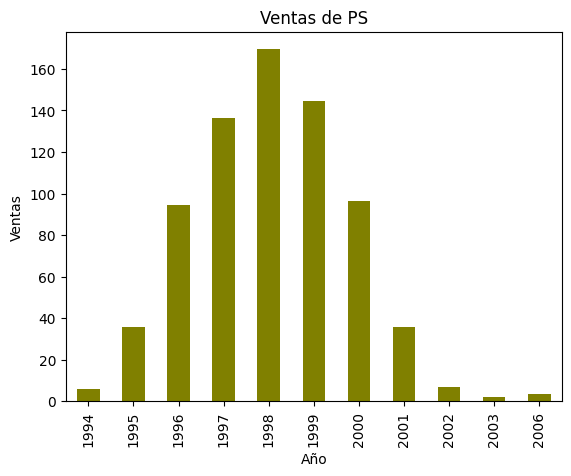

In [52]:
# Mostramos el gráfico PS
group_ps.plot(kind="bar",
              xlabel="Año",
              ylabel="Ventas",
              title="Ventas de PS",
              color= "olive")

plt.show()

PS tuvo su mayor numero de ventas en 1998 seguido por el año 1999, para 2002 tuvo su primer descenso considerable y el 2006 aún tuvo algunas ventas.

In [53]:
# Buscamos el total de las ventas de NES por año
filtered_nes = df_ice_data[df_ice_data["platform"] == "NES"]
group_nes = filtered_nes.groupby("year_of_release")["total_sales"].sum()
print(group_nes.head())

year_of_release
1983    10.96
1984    50.08
1985    53.44
1986    36.41
1987    19.76
Name: total_sales, dtype: float64


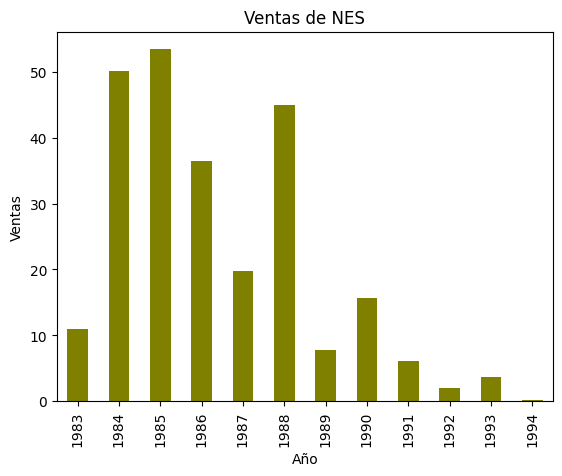

In [54]:
# Mostramos el gráfico NES
group_nes.plot(kind="bar",
              xlabel="Año",
              ylabel="Ventas",
              title="Ventas de NES",
              color= "olive")

plt.show()

En la plataforma NES se puedo observar que desde el segundo año de sus lanzamientos se registró altas ventas, hasta 1989 que fue uno de sus primeros descensos considerables, y siendo 1994 su último año en que se registraran ventas. 

In [55]:
# Buscamos el total de las ventas de GB por año
filtered_gb = df_ice_data[df_ice_data["platform"] == "GB"]
group_gb = filtered_gb.groupby("year_of_release")["total_sales"].sum()
print(group_gb.head())

year_of_release
1988     1.43
1989    64.97
1990     4.89
1991     5.57
1992    25.49
Name: total_sales, dtype: float64


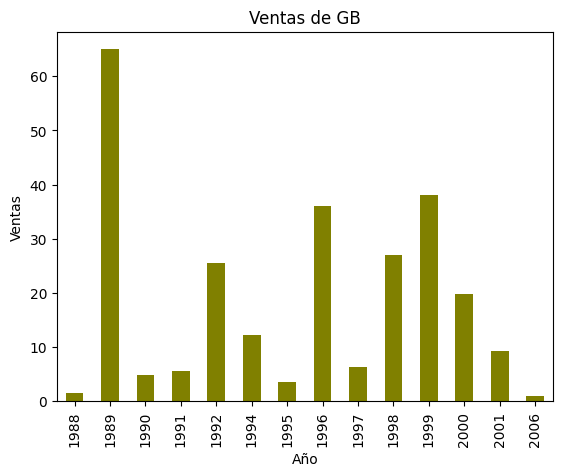

In [56]:
# Mostramos el gráfico GB
group_gb.plot(kind="bar",
              xlabel="Año",
              ylabel="Ventas",
              title="Ventas de GB",
              color= "olive")

plt.show()

Se puede observar que la plataforma GB en su segundo año de lanzamientos registró su mayor venta, para 2006 este tuvo sus últimos lanzamientos y ventas registradas, las cuales comparándolas con su venta más alta tiene un descenso bastante considerable. 

### Los años con más ventas
<a id="Los años con más ventas"></a>

In [57]:
# Mostramos las plataformas que obtuvieron ventas en 2008
platform_2008 = df_ice_data[df_ice_data["year_of_release"] == 2008]
total_sales_2008 = platform_2008.groupby("platform")["total_sales"].sum()
print(total_sales_2008.head())

platform
DC       0.04
DS     145.31
PC      12.42
PS2     53.90
PS3    118.52
Name: total_sales, dtype: float64


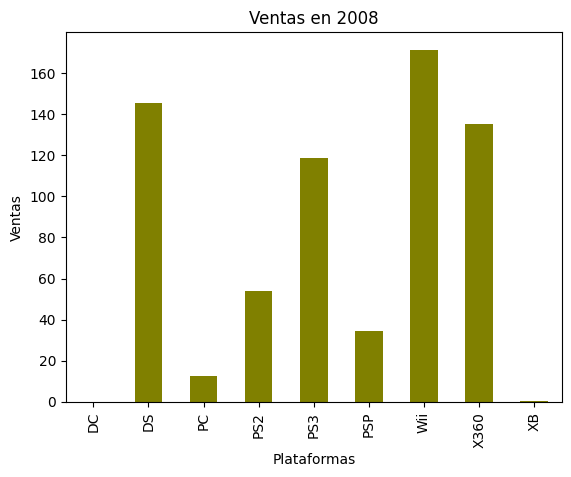

In [59]:
# Mostramos el gráfico de las ventas realizadas en 2008
total_sales_2008.plot(kind="bar",
                      xlabel="Plataformas",
                      ylabel="Ventas",
                      title="Ventas en 2008",
                      color= "olive")

plt.show()

Para el año 2008 que fue en el que más se realizaron ventas, las plataformas que más sobresalen son Wii, seguido por DS y X360.

In [60]:
# Mostramos las plataformas que obtuvieron ventas en 2009
platform_2009 = df_ice_data[df_ice_data["year_of_release"] == 2009]
total_sales_2009 = platform_2009.groupby("platform")["total_sales"].sum()
print(total_sales_2009.head())

platform
DS     119.54
PC      16.91
PS2     26.40
PS3    130.93
PSP     37.78
Name: total_sales, dtype: float64


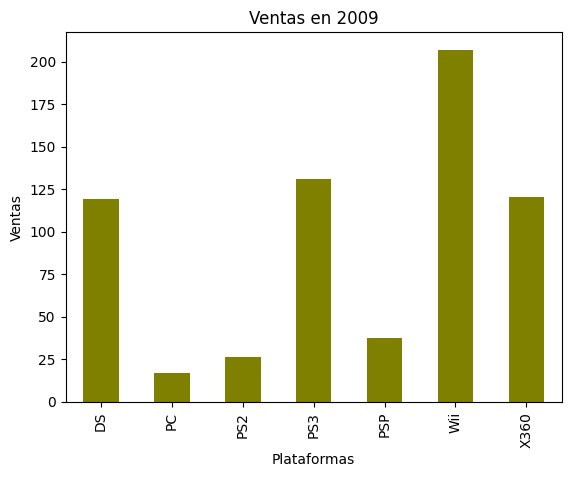

In [62]:
# Mostramos el gráfico de las ventas realizadas en 2009
total_sales_2009.plot(kind="bar",
                      xlabel="Plataformas",
                      ylabel="Ventas",
                      title="Ventas en 2009",
                      color= "olive")

plt.show()

Para el año 2009 que fue el segundo año con más ventas registradas, las plataformas que más sobresalen son Wii, PS3 y X360, aquí podemos ver que las plataformas Wii y X360 se repiten en ambos años. 

### Análisis de las puntuaciones
<a id="Análisis de las puntuaciones"></a>

In [63]:
filtered_critic_score = df_ice_data.groupby("critic_score")["total_sales"].sum()
print(filtered_critic_score.head())

critic_score
13    0.04
17    0.10
19    0.62
20    1.87
21    0.12
Name: total_sales, dtype: float64


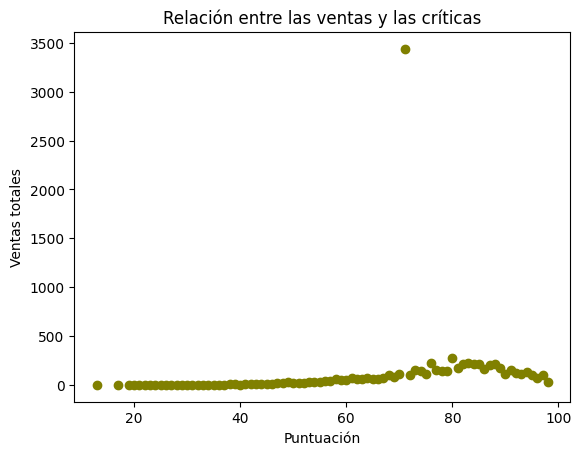

In [64]:
# Mostramos el gráfico de dispersión de critic_score
filtered_critic_score.plot(title="Relación entre las ventas y las críticas", 
                           x="critic_score", 
                           y="total_sales", 
                           style="o", 
                           xlabel="Puntuación",
                           ylabel="Ventas totales",
                           color="olive")

plt.show()

Como podemos observar la mayoría de los puntos se concentran en el eje x, por lo que podemos decir que, aunque aumenta la puntuación que los profesionales le dan a las plataformas las ventas que se realizan de estas no aumentan, también podemos decir que tenemos un valor atípico muy notable con una puntuación algo alta y con ventas de casi 3500, la mayor concentración de los datos esta entre las puntuaciones de 20 y 80.

In [65]:
# Obtenemos la correlacion de total_sales y critic_score
correlation_critic_score = df_ice_data["critic_score"].corr(df_ice_data["total_sales"])
print(correlation_critic_score)

0.18977325512080193


La correlación que se muestra entre las reseñas de los profesionales y las ventas totales tienen una correlación baja, lo que nos dice que la relación entre los dos aspectos es muy baja.   

## Análisis por región 
<a id="Análisis por región"></a>

### Ventas en Norteamérica
<a id="Ventas en Norteamérica"></a>

In [69]:
# Obtenemos las ventas totales por plataformas en Norteamérica
sales_na_filter = df_ice_data.groupby("platform")["na_sales"].sum()
print(sales_na_filter.head())

platform
2600     90.60
3DO       0.00
3DS      83.49
DC        5.43
DS      382.40
Name: na_sales, dtype: float64


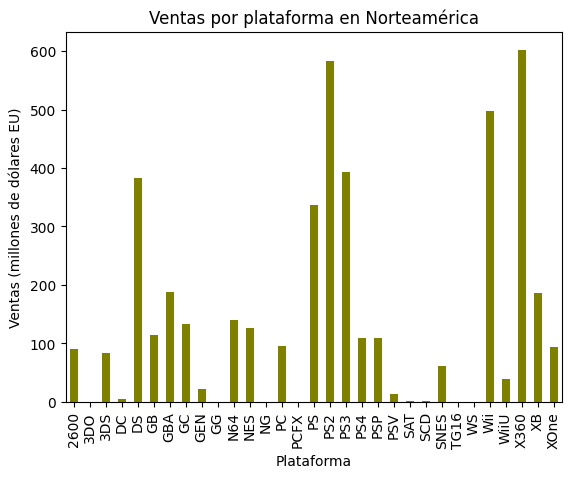

In [70]:
# Mostramos el gráfico de las ventas por plataforma en Norteamérica 
sales_na_filter.plot(title="Ventas por plataforma en Norteamérica",
                    kind="bar",
                    xlabel="Plataforma",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.show()

Como se puede observar en el gráfico la platafroma que tiene más ventas en Norteamérica es X360 con 602 millones de dólares, en segundo lugar esta PS2 y en tercer lugar esta Wii

In [71]:
# Obtenemos las ventas totales por género en Norteamérica
genre_na_filter = df_ice_data.groupby("genre")["na_sales"].sum()
print(genre_na_filter.head())

genre
Action       879.01
Adventure    105.26
Fighting     223.36
Misc         407.27
Platform     445.50
Name: na_sales, dtype: float64


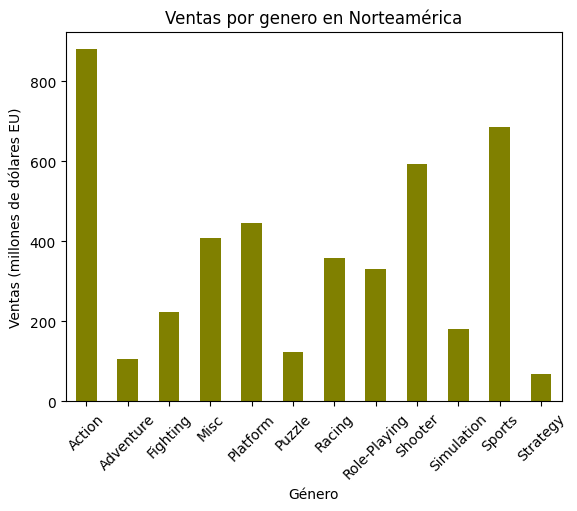

In [72]:
# Mostramos el gráfico de las ventas por género en Norteamérica
genre_na_filter.plot(title="Ventas por genero en Norteamérica",
                    kind="bar",
                    xlabel="Género",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.xticks(rotation=45)
plt.show()

Observamos que en Norteamérica el género con más ventas es Acción con más de 800 millones de dólares vendidos, seguido por Deportes y el género menos vendido es el de Estrategia.

In [73]:
# Obtenemos las ventas totales por clasificación en Norteamérica
rating_na_filter = df_ice_data.groupby("rating")["na_sales"].sum()
print(rating_na_filter)

rating
AO                    1.26
E                  1292.99
E10+                353.32
EC                    1.53
K-A                   2.56
M                   748.48
RP                    0.00
T                   759.75
sin especificar    1242.46
Name: na_sales, dtype: float64


Una de las clasificaciones con más ventas en Norteamérica es la apta E (para todas las edades), con más de 1200 millones de dólares vendidos, seguida por la clasificacion T (apto para mayores de 13 años) con 759 millones de dólares vendidos.

###  Ventas en Europa
<a id="Ventas en Europa"></a>

In [74]:
# Obtenemos las ventas totales por plataformas en Europa
sales_eu_filter = df_ice_data.groupby("platform")["eu_sales"].sum()
print(sales_eu_filter.head())

platform
2600      5.47
3DO       0.00
3DS      61.48
DC        1.69
DS      188.89
Name: eu_sales, dtype: float64


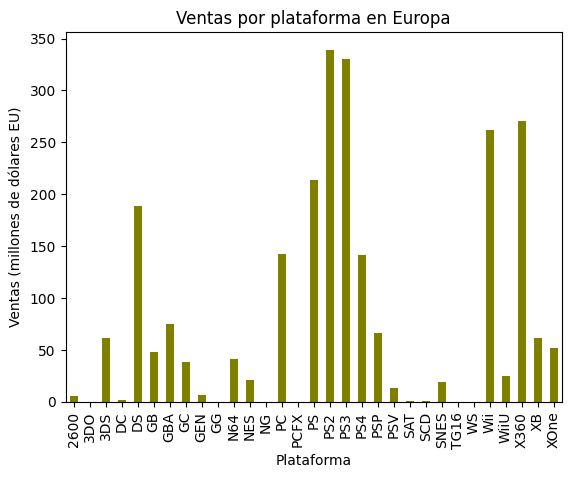

In [75]:
# Mostramos el gráfico de las ventas por plataforma en Europa
sales_eu_filter.plot(title="Ventas por plataforma en Europa",
                    kind="bar",
                    xlabel="Plataforma",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.show()

Observamos que la platafroma más vendida en Europa es PS2 con más de 300 millones de dólares vendidos, en segundo lugar esta la plataforma PS3.

In [76]:
# Obtenemos las ventas totales por género en Europa
genre_eu_filter = df_ice_data.groupby("genre")["eu_sales"].sum()
print(genre_eu_filter.head())

genre
Action       519.13
Adventure     63.54
Fighting     100.33
Misc         212.74
Platform     200.35
Name: eu_sales, dtype: float64


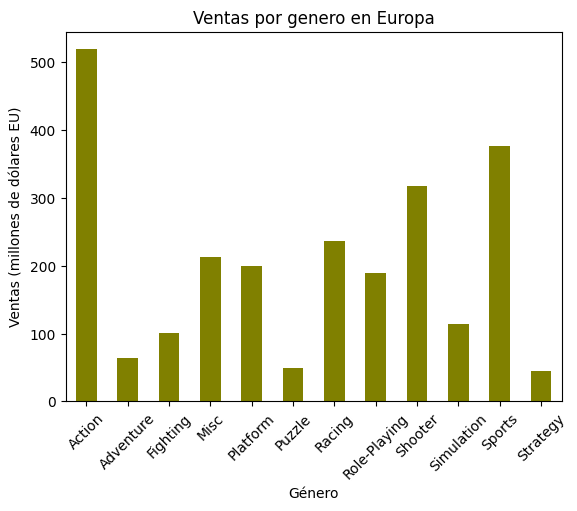

In [77]:
# Mostramos el gráfico de las ventas por género en Europa
genre_eu_filter.plot(title="Ventas por genero en Europa",
                    kind="bar",
                    xlabel="Género",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.xticks(rotation=45)
plt.show()

El género que más se vende en Europa con 519 millones de dólares es el de Acción, en segundo lugar esta el género de Deportes y en tercer lugar esta el género de Juego de roles.

In [78]:
# Obtenemos las ventas totales por clasificación en Europa
rating_eu_filter = df_ice_data.groupby("rating")["eu_sales"].sum()
print(rating_eu_filter)

rating
AO                   0.61
E                  710.25
E10+               188.52
EC                   0.11
K-A                  0.27
M                  483.97
RP                   0.08
T                  427.03
sin especificar    613.83
Name: eu_sales, dtype: float64


La clasificación que con más ventas es la E (apto para todas las edades), la M (apto para mayores de 17 años) y las que menos tiene ventas son RP y AO (apto solo para adultos).

### Ventas en Japón
<a id="Ventas en Japón"></a>

In [79]:
# Obtenemos las ventas totales por plataformas en Japón
sales_jp_filter = df_ice_data.groupby("platform")["jp_sales"].sum()
print(sales_jp_filter.head())

platform
2600      0.00
3DO       0.10
3DS     100.67
DC        8.56
DS      175.57
Name: jp_sales, dtype: float64


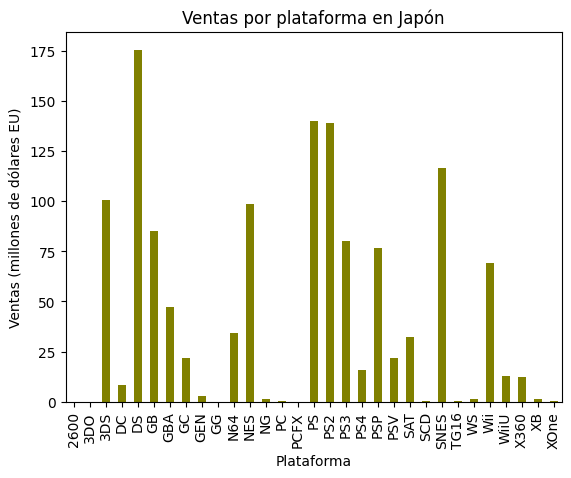

In [80]:
# Mostramos el gráfico de las ventas por plataforma en Japón
sales_jp_filter.plot(title="Ventas por plataforma en Japón",
                    kind="bar",
                    xlabel="Plataforma",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.show()

La platafroma con más ventas en Japón es DS con 175 millones de dólares vendidos, seguido por PS y PS2.

In [81]:
# Obtenemos las ventas totales por genero en Japón
genre_jp_filter = df_ice_data.groupby("genre")["jp_sales"].sum()
print(genre_jp_filter.head())

genre
Action       161.43
Adventure     52.30
Fighting      87.48
Misc         108.11
Platform     130.83
Name: jp_sales, dtype: float64


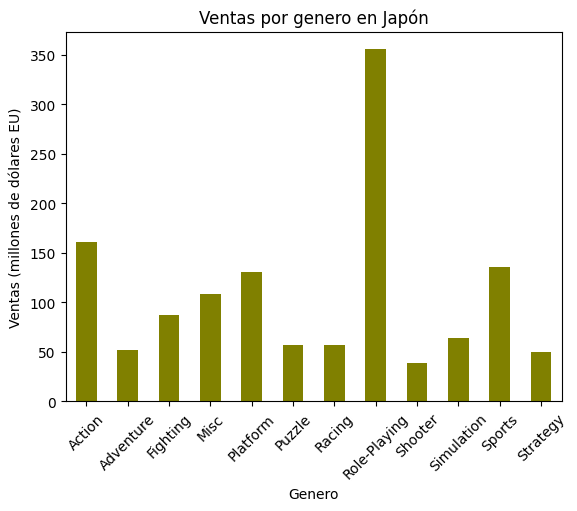

In [82]:
# Mostramos el gráfico de las ventas por genero en Japón
genre_jp_filter.plot(title="Ventas por genero en Japón",
                    kind="bar",
                    xlabel="Genero",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.xticks(rotation=45)
plt.show()

El genero más vendido en Japón es de Juego de roles, el cual reprecenta un porcentaje considerable de las ventas por genero en Japón, otro de los generos más vendidos es el de Acción.

In [83]:
# Obtenemos las ventas totales por clasificación en Japón
rating_jp_filter = df_ice_data.groupby("rating")["jp_sales"].sum()
print(rating_jp_filter)

rating
AO                   0.00
E                  198.11
E10+                40.20
EC                   0.00
K-A                  1.46
M                   64.24
RP                   0.00
T                  151.40
sin especificar    841.96
Name: jp_sales, dtype: float64


En Japón las ventas que más se realizaron fueron las de clasificación E (apto para todas las edades) y la T (apto para mayores de 13 años.

### Otras ventas
<a id="Otras ventas"></a>

In [84]:
# Obtenemos las ventas totales por plataformas de otras ventas
sales_ot_filter = df_ice_data.groupby("platform")["other_sales"].sum()
print(sales_ot_filter.head())

platform
2600     0.91
3DO      0.00
3DS     13.36
DC       0.27
DS      59.26
Name: other_sales, dtype: float64


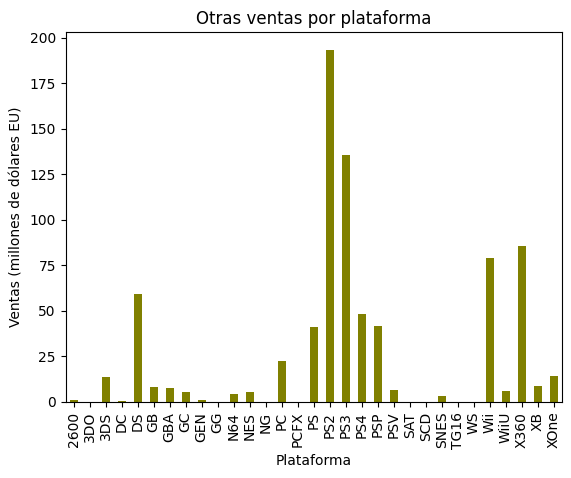

In [85]:
# Mostramos el gráfico de las ventas por plataforma de otras ventas
sales_ot_filter.plot(title="Otras ventas por plataforma",
                    kind="bar",
                    xlabel="Plataforma",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.show()

En otras ventas realizadas la plataforma que más destaca por sus ventas es PS2 con poco más de 175 millones de dólares vendidos, seguido por PS3 y en tercer lugar en ventas esta X360. 

In [86]:
# Obtenemos las ventas totales por género de otras ventas
genre_ot_filter = df_ice_data.groupby("genre")["other_sales"].sum()
print(genre_ot_filter.head())

genre
Action       184.60
Adventure     16.49
Fighting      36.36
Misc          74.39
Platform      51.09
Name: other_sales, dtype: float64


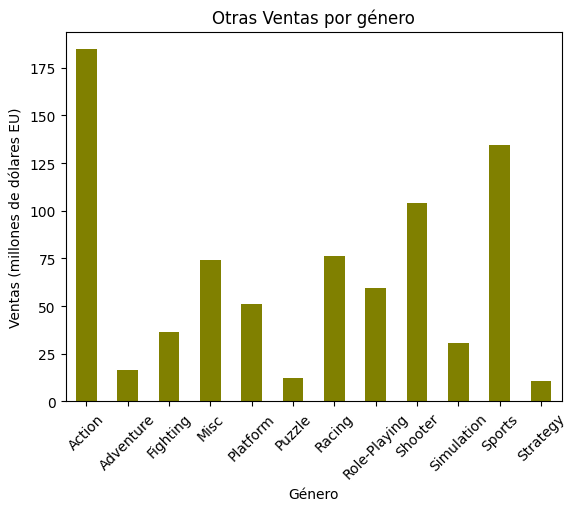

In [87]:
# Mostramos el gráfico de las ventas por género de otras ventas
genre_ot_filter.plot(title="Otras Ventas por género",
                    kind="bar",
                    xlabel="Género",
                    ylabel="Ventas (millones de dólares EU)",
                    color="olive")

plt.xticks(rotation=45)
plt.show()

Con 184 millones de dólares vendidos el género de Acción es en el más vendido, seguido por el de Deportes con poco mas de 125 millones de dólares vendidos.

In [88]:
# Obtenemos las ventas totales por clasificación de otras ventas
rating_ot_filter = df_ice_data.groupby("rating")["other_sales"].sum()
print(rating_ot_filter)

rating
AO                   0.09
E                  234.17
E10+                73.56
EC                   0.11
K-A                  0.03
M                  177.10
RP                   0.01
T                  155.17
sin especificar    151.08
Name: other_sales, dtype: float64


Las ventas que se regitraron de acuerdo a las clasificasiones de otras ventas en primer lugar tenemos a la clasificación E (apto para todas las edades y M (apto para mayores de 17 años). 

## Prueba de hipótesis
<a id="Prueba de hipótesis"></a>

Hipótesis nula: las calificaciones promedio de de los usuarios para las platafromas PS2 y PS son las mismas.

Hipótesis alternativa: las calificaciones promedio de de los usuarios para las platafromas PS2 y PS no son las mismas.

In [91]:
ps2_hip = df_ice_data[df_ice_data["platform"] == "PS2"]
score_ps2 = ps2_hip["user_score"]
ps_hip = df_ice_data[df_ice_data["platform"] == "PS"]
score_ps = ps_hip["user_score"]

In [98]:
# Prueba de la hipótesis 1
# Realizar la prueba de Levene
levene_hip_1 = levene(ps2_hip["user_score"], ps_hip["user_score"])

alpha = 0.05

results = st.ttest_ind(score_ps2, score_ps, equal_var= False)

print("valor p: ", results.pvalue)

if p_value > alpha:
    print('No se rechaza la hipótesis nula: las varianzas son iguales.')
else:
    print('Se rechaza la hipótesis nula: las varianzas son diferentes.')

valor p:  0.0014547084927952765
Se rechaza la hipótesis nula: las varianzas son diferentes.


Las plataformas escogidas para realizar esta hipótesis es PS2 por ser las más vendida en periodo 2000-2016 y la plataforma PS por ser la más vendida en el periodo 1980-1999.

Hipótesis nula: las calificaciones promedio de los usuarios  para los generos de acción y deportes son diferentes.

Hipótesis alternativa: las calificaciones promedio de los usuarios para los generos de acción y deportes no son diferentes. 

In [96]:
action_hip = df_ice_data[df_ice_data["genre"] == "Action"]
score_action = action_hip["user_score"]
sports_hip = df_ice_data[df_ice_data["genre"] == "Sports"]
score_sports = sports_hip["user_score"]

In [99]:
# Prueba de la hipótesis 2
# Realizar la prueba de Levene
levene_hip_1 = levene(action_hip["user_score"], sports_hip["user_score"])

alpha = 0.05

results = st.ttest_ind(score_action, score_sports, equal_var= False) 

print("valor p: ", results.pvalue) 

if p_value > alpha:
    print('No se rechaza la hipótesis nula: las varianzas son iguales.')
else:
    print('Se rechaza la hipótesis nula: las varianzas son diferentes.')

valor p:  7.076545408683597e-12
Se rechaza la hipótesis nula: las varianzas son diferentes.


Estos géneros fueron escogidos para esta hipótesis debido a que son los géneros más populares.

## Conclusiones 
<a id="Conclusiones"></a>

Después de realizar el análisis pertinente a los datos de Ice, el cual realizamos con la intención de obtener información a cerca de las plataformas prometedoras para incluirlas en el año 2017, podemos decir que:

- Existen varias plataformas las cuales se han encontrado adecuadas para volver a incluir en el año 2017, tales como:
    
    PS2:
    - Esta es una de las plataformas que obtuvo más ventas en el periodo de 1980 a 2016.
    - Obteniendo ventas desde el año 2000 a hasta el año 2011, esto quiere decir que estuvo generando ingresos por 12 años.
    - Tiene el segundo puesto como plataforma más vendida en Norteamérica con 583 millones de dólares vendidos.
    - El primer puesto en Europa con 339 millones de dólares vendidos.
    - Además es la tercera plataforma más vendida en Japón con 139 millones de dólares vendidos y el primer lugar en ventas de otras ventas con 193 millones de dólares vendidos.
    
    X360:
    - Esta plataforma es otra buena opción al ser la segunda plataforma con más ventas en el periodo de 1980 a 2016.
    - En el periodo de 2000 a 2016 está posicionado en el segundo lugar con más ventas.
    - Para las ventas realizadas en Norteamérica es la plataforma más vendida con 602 millones de dólares.
    - En otras ventas realizadas obtuvo 85 millones de dólares siendo la tercera plataforma más vendida.
    - Tuvo ventas en el periodo de 2005 a 2016 estando 12 años generando ingresos.
    
    PS3:
    - El periodo de1980 a 2016 es la tercera plataforma más vendida.
    - En el periodo de 2000 a 2016 es de igual forma la tercera plataforma más vendida.
    - La plataforma tiene ventas desde el 2006 hasta el 2016, siendo 11 años en la que estuvo realizando ventas.
    - En Norteamérica tiene ventas de 393 millones de dólares, posicionándose como la cuarta plataforma más vendida.
    - Otras ventas que se han realizado se tiene el registro de 135 millones de dólares obtenidos.
    
- Otras plataformas que se destacan de entre las 31 plataformas que también podrían ser consideradas son:
    - Wii es otra buena opción para ser considerada, en Norteamérica ocupa el tercer lugar en ventas con 496 millones de dólares, en Europa ocupa el cuarto lugar con 262 millones de dólares vendidos, es una de las plataformas más vendidas en el año en que más se registraron ventas (2008) y en también el número uno en las ventas del segundo año con más ventas registradas (2009).
    - DS es otra buena opción a considerar, en Japón es la plataforma más vendida con 175 millones de dólares vendidos, aunque en las demás regiones este entre la cuarta o quinta plataforma más vendida en el año 2008 es la segunda plataforma con más ventas.
    
- El género es otro de los puntos a considerar para la selección de plataformas es el género siendo el de Acción el género más vendido en Norteamérica, Europa y otras ventas, el general se obtuvieron ventas de 1744 millones de dólares vendidos, otro de los géneros a considerar es el de Deportes siendo en segundo más vendido en Norteamérica, Europa y otras ventas. Para Japón el género a considerar es el de Juego de roles ya que es de lo más vendido en esta región. 

- La clasificación es otro punto a considerar siendo E (apto para todas las edades) el más vendido en Norteamérica, Europa y otras ventas, para Japón las ventas que más se realizaron las de acuerdo a la clasificación están sin especificar, pero la segunda más vendida es la clasificación E (apto para todas las edades).